<a href="https://colab.research.google.com/github/jeong1suk/Capstone_ElectricCar/blob/beoman/%EC%9D%BC%EB%8B%A8_%EC%B5%9C%EC%A2%85%EA%B0%99%EC%9D%80_%EC%B5%9C%EC%A2%85_yolov5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sat Nov 19 01:42:44 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:

%mkdir /content/dataset
%cd /content/dataset/
!curl -L "https://public.roboflow.com/ds/oNb5m9drgN?key=1EhJyBNxmW" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 extracting: valid/labels/000000000139_jpg.rf.e21873da59c8d102916fa46e9a7d62f3.txt  
 extracting: valid/labels/000000000285_jpg.rf.60e3658db36698420a03e3fc071943f0.txt  
 extracting: valid/labels/000000000632_jpg.rf.bfddd0d2b86ac2bf1e80624422433f0a.txt  
 extracting: valid/labels/000000000724_jpg.rf.905934be986f8fbaedec06c48141a84e.txt  
 extracting: valid/labels/000000000776_jpg.rf.3a6b1375e3360b81da552a3054355666.txt  
 extracting: valid/labels/000000000785_jpg.rf.e08b383cecfdaaa774b3780ab5e06baa.txt  
 extracting: valid/labels/000000000802_jpg.rf.9717c2d9df9e467803d11f211672d1c4.txt  
 extracting: valid/labels/000000000872_jpg.rf.89b5c1b297b29c118dd11a202d91d647.txt  
 extracting: valid/labels/000000000885_jpg.rf.9bedbaab383445bc7ad6b3711224be3b.txt  
 extracting: valid/labels/000000001000_jpg.rf.a3c5a2484544de19f7cb041f2eb43605.txt  
 extracting: valid/labels/000000001268_jpg.rf.48cbad51033f60a71d4370e1b6cb12ca.txt  
 extracting: valid/labels/000

In [3]:
%cd /content
!git clone https://github.com/ultralytics/yolov5.git

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 15173, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 15173 (delta 46), reused 49 (delta 24), pack-reused 15088
Receiving objects: 100% (15173/15173), 13.83 MiB | 31.41 MiB/s, done.
Resolving deltas: 100% (10479/10479), done.


In [4]:
%cd /content/yolov5/
!pip install -r requirements.txt

/content/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 7.2 MB/s 


In [5]:
import os
from glob import glob 
img_list = sorted(glob('/content/dataset/train/images/*.jpg'))
for fname in img_list:
  pass
txt_list = sorted(glob('/content/dataset/train/labels/*.txt'))
for fname in txt_list:
  pass
val_img_list = sorted(glob('/content/dataset/valid/images/*.jpg'))
for fname in val_img_list:
  pass
vla_txt_list = sorted(glob('/content/dataset/valid/labels/*.txt'))
for fname in val_img_list:
  pass


In [6]:
# 데이터셋 위치 수정
#파일의 위치, 클래스명 알려주는 설정파일이라 경로 수정
import yaml

with open('/content/dataset/data.yaml', 'r') as f:
  data = yaml.load(f, Loader=yaml.Loader)

print(data)

data['train'] = '/content/dataset/train/images/'
data['val'] = '/content/dataset/valid/images/'
data['nc'] = 7
data['names'] = ['bicycle','motorbike', 'person', 'kickboard', 'number-plate', 'parking-cone', 'signpost'] 
with open('/content/dataset/data.yaml', 'w') as f:
  yaml.dump(data, f)

print(data)
#print(len(data['names']))

{'train': '../train/images', 'val': '../valid/images', 'nc': 80, 'names': ['aeroplane', 'apple', 'backpack', 'banana', 'baseball bat', 'baseball glove', 'bear', 'bed', 'bench', 'bicycle', 'bird', 'boat', 'book', 'bottle', 'bowl', 'broccoli', 'bus', 'cake', 'car', 'carrot', 'cat', 'cell phone', 'chair', 'clock', 'cow', 'cup', 'diningtable', 'dog', 'donut', 'elephant', 'fire hydrant', 'fork', 'frisbee', 'giraffe', 'hair drier', 'handbag', 'horse', 'hot dog', 'keyboard', 'kite', 'knife', 'laptop', 'microwave', 'motorbike', 'mouse', 'orange', 'oven', 'parking meter', 'person', 'pizza', 'pottedplant', 'refrigerator', 'remote', 'sandwich', 'scissors', 'sheep', 'sink', 'skateboard', 'skis', 'snowboard', 'sofa', 'spoon', 'sports ball', 'stop sign', 'suitcase', 'surfboard', 'teddy bear', 'tennis racket', 'tie', 'toaster', 'toilet', 'toothbrush', 'traffic light', 'train', 'truck', 'tvmonitor', 'umbrella', 'vase', 'wine glass', 'zebra']}
{'train': '/content/dataset/train/images/', 'val': '/conten

In [ ]:

# with open('/content/yolov5/models/yolov5s.yaml', 'r') as f:
#   data = yaml.load(f, Loader=yaml.Loader)

# print(data)

# data['nc'] = 16
# with open('/content/yolov5/models/yolov5s.yaml', 'w') as f:
#   yaml.dump(data, f)

# print(data)

{'nc': 80, 'depth_multiple': 0.33, 'width_multiple': 0.5, 'anchors': [[10, 13, 16, 30, 33, 23], [30, 61, 62, 45, 59, 119], [116, 90, 156, 198, 373, 326]], 'backbone': [[-1, 1, 'Conv', [64, 6, 2, 2]], [-1, 1, 'Conv', [128, 3, 2]], [-1, 3, 'C3', [128]], [-1, 1, 'Conv', [256, 3, 2]], [-1, 6, 'C3', [256]], [-1, 1, 'Conv', [512, 3, 2]], [-1, 9, 'C3', [512]], [-1, 1, 'Conv', [1024, 3, 2]], [-1, 3, 'C3', [1024]], [-1, 1, 'SPPF', [1024, 5]]], 'head': [[-1, 1, 'Conv', [512, 1, 1]], [-1, 1, 'nn.Upsample', ['None', 2, 'nearest']], [[-1, 6], 1, 'Concat', [1]], [-1, 3, 'C3', [512, False]], [-1, 1, 'Conv', [256, 1, 1]], [-1, 1, 'nn.Upsample', ['None', 2, 'nearest']], [[-1, 4], 1, 'Concat', [1]], [-1, 3, 'C3', [256, False]], [-1, 1, 'Conv', [256, 3, 2]], [[-1, 14], 1, 'Concat', [1]], [-1, 3, 'C3', [512, False]], [-1, 1, 'Conv', [512, 3, 2]], [[-1, 10], 1, 'Concat', [1]], [-1, 3, 'C3', [1024, False]], [[17, 20, 23], 1, 'Detect', ['nc', 'anchors']]]}
{'nc': 16, 'depth_multiple': 0.33, 'width_multiple':

In [7]:
import os
from glob import glob 
img_list = glob('/content/dataset/train/images/*.jpg') #glob 함수는 사용자가 제시한 조건에 맞는 파일명을 리스트 형식으로 반환
txt_list = glob('/content/dataset/train/labels/*.txt')
val_img_list = glob('/content/dataset/valid/images/*.jpg') #glob 함수는 사용자가 제시한 조건에 맞는 파일명을 리스트 형식으로 반환
val_txt_list = glob('/content/dataset/valid/labels/*.txt')
print(len(img_list))
print(len(txt_list))
print(len(val_img_list))
print(len(val_txt_list))

116408
116408
5000
5000


In [8]:
import os
from glob import glob 
img_list = sorted(glob('/content/dataset/train/images/*.jpg'))
for fname in img_list:
  pass
txt_list = sorted(glob('/content/dataset/train/labels/*.txt'))
for fname in txt_list:
  pass
val_img_list = sorted(glob('/content/dataset/valid/images/*.jpg'))
for fname in val_img_list:
  pass
val_txt_list = sorted(glob('/content/dataset/valid/labels/*.txt'))
for fname in val_img_list:
  pass

label = [9, 43, 48]
for i in range(len(txt_list)):
  with open(txt_list[i], 'r') as f:
    line = None 
    n = 0
    while line != '':
      line = f.readline()
      if line == '' and n == 0:
        os.remove(txt_list[i])
        os.remove(img_list[i])
        break
      if line == '': break
      line1 = line.split()
      if int(line1[0]) not in label:
        os.remove(txt_list[i])
        os.remove(img_list[i])
        break
      n+=1

for i in range(len(val_txt_list)):
  with open(val_txt_list[i], 'r') as f:
    line = None    
    n = 0
    while line != '':
      line = f.readline()
      if line == '' and n == 0:
        os.remove(vla_txt_list[i])
        os.remove(val_img_list[i])
        break
      if line == '': break
      line1 = line.split()
      if int(line1[0]) not in label:
        os.remove(val_txt_list[i])
        os.remove(val_img_list[i])
        break
      n+=1

In [9]:
%cd /content/dataset/valid/labels/
!unzip -qq "/content/v_lab.zip"

/content/dataset/valid/labels


In [10]:
%cd /content/dataset/valid/images/
!unzip -qq "/content/v_img.zip"

/content/dataset/valid/images


In [11]:
%cd /content/dataset/train/images/
!unzip -qq "/content/t_img.zip"

/content/dataset/train/images


In [12]:
%cd /content/dataset/train/labels/
!unzip -qq "/content/t_lab.zip"

/content/dataset/train/labels


In [13]:
img_list = glob('/content/dataset/train/images/*.jpg') #glob 함수는 사용자가 제시한 조건에 맞는 파일명을 리스트 형식으로 반환
txt_list = glob('/content/dataset/train/labels/*.txt')
val_img_list = glob('/content/dataset/valid/images/*.jpg') #glob 함수는 사용자가 제시한 조건에 맞는 파일명을 리스트 형식으로 반환
val_txt_list = glob('/content/dataset/valid/labels/*.txt')
print(len(img_list))
print(len(txt_list))
print(len(val_img_list))
print(len(val_txt_list))

1836
1836
174
174


In [14]:
for i in range(len(val_txt_list)):
  qwe = []
  with open(val_txt_list[i], 'r') as f:
    lines = f.readlines()
    for line in lines:
      line = line.split()
      if line[0] == '9':
        line[0] = '0'
      elif line[0] == '43':
        line[0] = '1'
      elif line[0] == '48':
        line[0] = '2'


        
        
      line[-1] = line[-1]+'\n'
      result = ' '.join(s for s in line)
      qwe.append(result)

  result2 = ''.join(s for s in qwe)

  with open(val_txt_list[i], 'w') as f:
    f.write(result2)

In [15]:
for i in range(len(txt_list)):
  qwe = []
  with open(txt_list[i], 'r') as f:
    lines = f.readlines()
    for line in lines:
      line = line.split()
      if line[0] == '9':
        line[0] = '0'
      elif line[0] == '43':
        line[0] = '1'
      elif line[0] == '48':
        line[0] = '2'

        
        
      line[-1] = line[-1]+'\n'
      result = ' '.join(s for s in line)
      qwe.append(result)

  result2 = ''.join(s for s in qwe)

  with open(txt_list[i], 'w') as f:
    f.write(result2)

In [16]:
img_list = glob('/content/dataset/train/images/*.jpg') #glob 함수는 사용자가 제시한 조건에 맞는 파일명을 리스트 형식으로 반환
txt_list = glob('/content/dataset/train/labels/*.txt')
val_img_list = glob('/content/dataset/valid/images/*.jpg') #glob 함수는 사용자가 제시한 조건에 맞는 파일명을 리스트 형식으로 반환
val_txt_list = glob('/content/dataset/valid/labels/*.txt')
print(len(img_list))
print(len(txt_list))
print(len(val_img_list))
print(len(val_txt_list))

1836
1836
174
174


In [17]:
%cd /content/yolov5/

# 욜로v5_s로 학습 
!python train.py --img 416 --batch 16 --epochs 18 --data /content/dataset/data.yaml --cfg ./models/yolov5m.yaml --weights yolov5m.pt --name number_yolov5m_results

/content/yolov5
train: weights=yolov5m.pt, cfg=./models/yolov5m.yaml, data=/content/dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=number_yolov5m_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-261-g9bc6034 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, io

/content


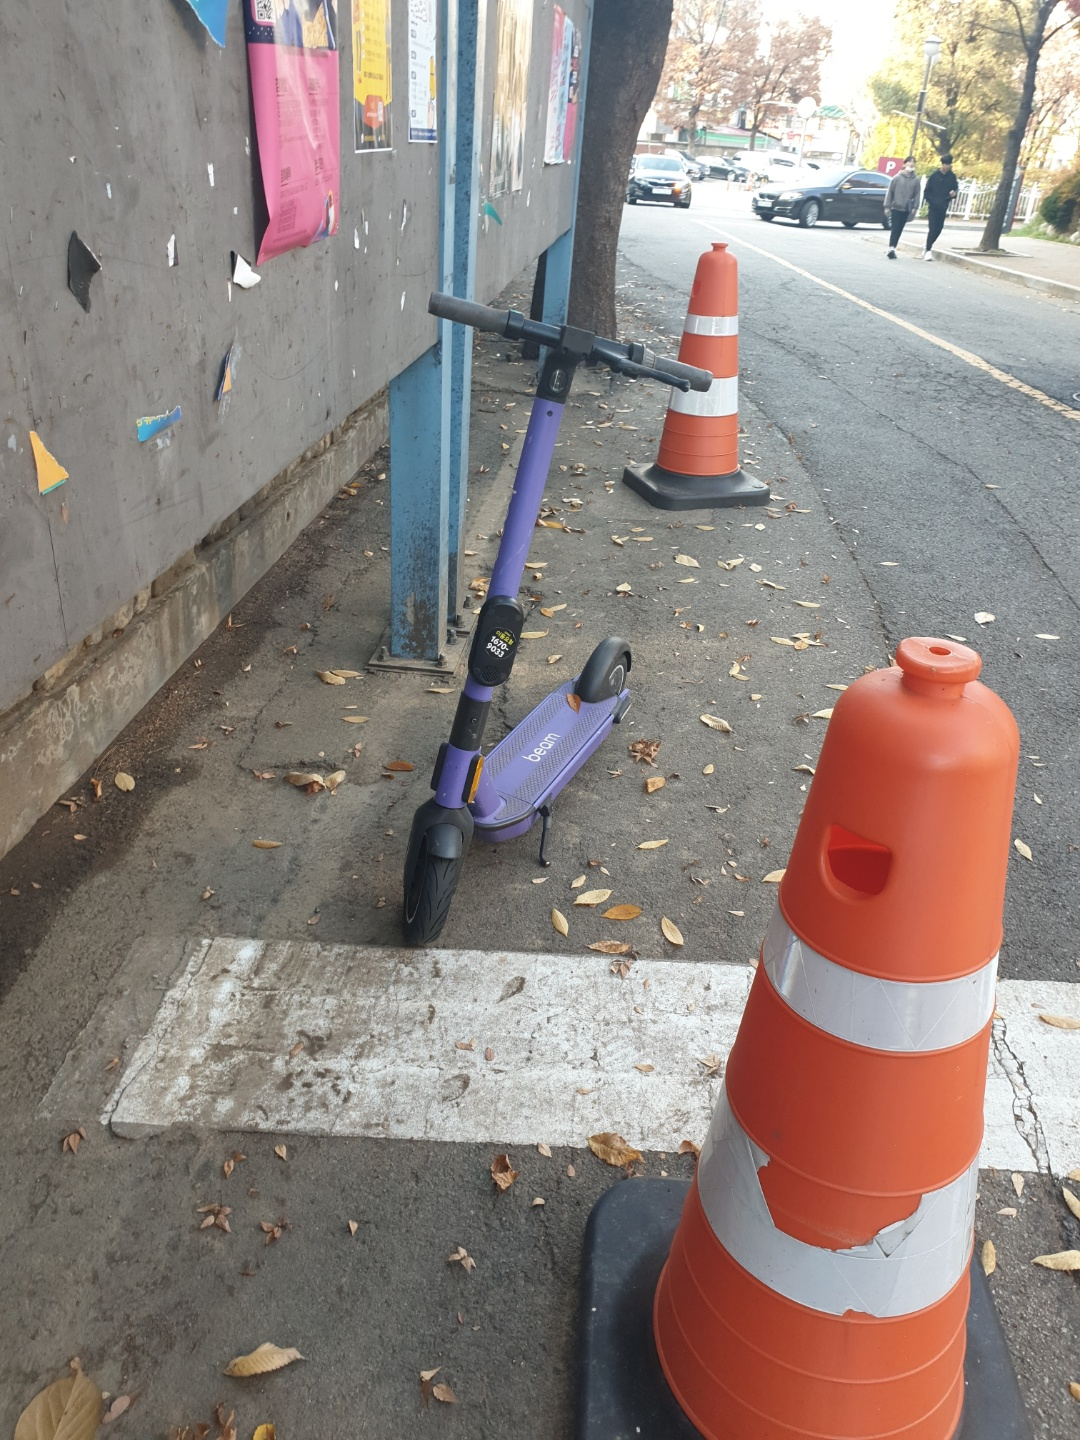

/content
/content/yolov5
detect: weights=['/content/yolov5/runs/train/number_yolov5m_results/weights/best.pt'], source=/content/qwer.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=ele, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-261-g9bc6034 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5m summary: 212 layers, 20877180 parameters, 0 gradients, 47.9 GFLOPs
image 1/1 /content/qwer.jpg: 416x416 1 kickboard, 18.3ms
Speed: 0.4ms pre-process, 18.3ms inference, 1.4ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/ele4
1 labels saved to runs/detect/ele4/labels


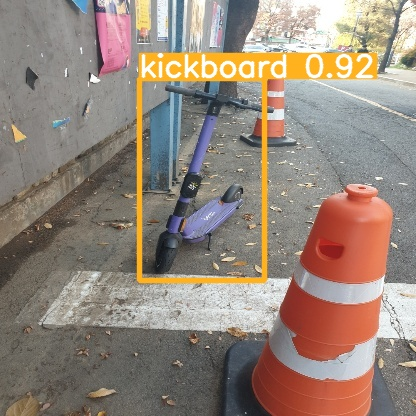

In [22]:

from IPython.display import Image
import os
%cd /content/
import cv2
from google.colab.patches import cv2_imshow


img = cv2.imread('/content/KakaoTalk_20221118_194800669_02.jpg')
cv2_imshow(img)
reimg = cv2.resize(img, dsize = (416,416))
%cd /content/
cv2.imwrite("qwer.jpg", reimg)
%cd /content/yolov5/


val_img_path = '/content/qwer.jpg'

weights_path = '/content/yolov5/runs/train/number_yolov5m_results/weights/best.pt'

!python detect.py --weights "{weights_path}" --img 416 --conf 0.5 --source "{val_img_path}" --save-crop --save-txt --name "ele" --save-conf        #70% 이상이면 성공



detect_img_path = '/content/yolov5/runs/detect/ele4'           
Image(os.path.join(detect_img_path, os.path.basename(val_img_path)))

In [20]:
!zip -r /content/yolov5.zip /content/yolov5

  adding: content/yolov5/ (stored 0%)
  adding: content/yolov5/models/ (stored 0%)
  adding: content/yolov5/models/yolov5m.yaml (deflated 60%)
  adding: content/yolov5/models/common.py (deflated 71%)
  adding: content/yolov5/models/yolov5l.yaml (deflated 61%)
  adding: content/yolov5/models/yolo.py (deflated 67%)
  adding: content/yolov5/models/yolov5s.yaml (deflated 60%)
  adding: content/yolov5/models/segment/ (stored 0%)
  adding: content/yolov5/models/segment/yolov5m-seg.yaml (deflated 60%)
  adding: content/yolov5/models/segment/yolov5l-seg.yaml (deflated 60%)
  adding: content/yolov5/models/segment/yolov5x-seg.yaml (deflated 60%)
  adding: content/yolov5/models/segment/yolov5s-seg.yaml (deflated 60%)
  adding: content/yolov5/models/segment/yolov5n-seg.yaml (deflated 60%)
  adding: content/yolov5/models/experimental.py (deflated 59%)
  adding: content/yolov5/models/yolov5x.yaml (deflated 60%)
  adding: content/yolov5/models/hub/ (stored 0%)
  adding: content/yolov5/models/hub/yolo